In [1]:
#Import BIOBSS and other required packages

#import biobss
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import biobss from local to run without installing
import sys
sys.path.append("../")
import biobss

### Pipeline Creation
Bio_Pipeline 

In [2]:
# For creating a pipeline, we need to create a Bio_Pipeline object
pipeline = biobss.pipeline.Bio_Pipeline()
# For creation pipeline with sliding window segmentation, we need to create a Bio_Pipeline object with sliding window segmentation
# Window Size and Step Size are the parameters for sliding window segmentation
# Window Size and Step size is represented in seconds
pipeline = biobss.pipeline.Bio_Pipeline(windowed_process=True, window_size = 10, step_size=5)

In [3]:
# For this example we will use sample PPG data from the biobss package
sample_data,info = biobss.utils.load_sample_data("PPG_LONG")
info

{'sampling_rate': 64, 'signal_length': 40}

<AxesSubplot:>

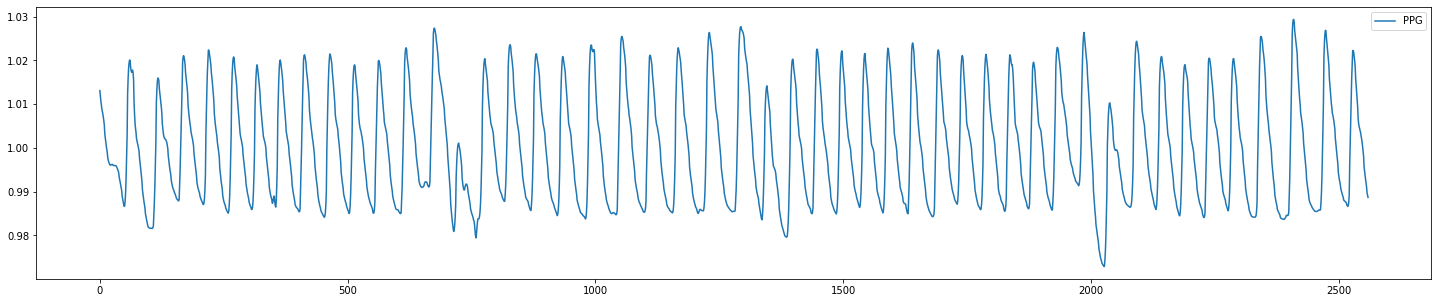

In [4]:
sample_data.plot(figsize=(25,5))

In [5]:
# We can set the input data to the pipeline using the set_input method
pipeline.set_input(sample_data,sampling_rate=info["sampling_rate"],name = "PPG")

In [6]:
pipeline.input

Signal object with 1 channel(s)
PPG (64Hz) (1 windows) ((2560,))

In [7]:
clean=biobss.pipeline.Bio_Process(process_method=biobss.ppgtools.filter_ppg,process_name="Clean PPG")
normalize = biobss.pipeline.Bio_Process(process_method=biobss.preprocess.normalize_signal,process_name="Normalize")
sr = info["sampling_rate"]

In [8]:
# For this example we w
pipeline.process_queue.add_process(clean,input_signals=["PPG"],output_signals=["PPG_CLEAN"],sampling_rate=sr)
pipeline.process_queue.add_process(normalize,input_signals=["PPG_CLEAN"],output_signals=["PPG_NORM"],sampling_rate=sr)

In [9]:
pipeline.run_pipeline()

c:\Users\cagatay.tasci\Desktop\integrate\BIOBSS\examples\..\biobss\ppgtools\ppg_filter.py:41: UserWarning: Default parameters will be used for filtering. 2th order bandpass filter with f1=0.5 Hz and f2=5 Hz.
  warnings.warn(f"Default parameters will be used for filtering. {N}th order bandpass filter with f1=0.5 Hz and f2=5 Hz.")


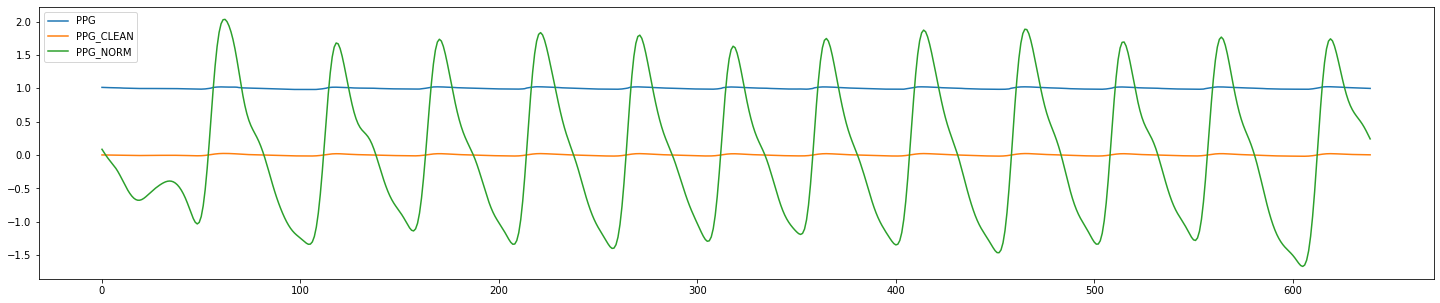

In [10]:
plt.figure(figsize=(25,5))
plt.plot(pipeline.data['PPG'].channel[0])
plt.plot(pipeline.data['PPG_CLEAN'].channel[0])
plt.plot(pipeline.data['PPG_NORM'].channel[0])
plt.legend(['PPG','PPG_CLEAN','PPG_NORM'])
